In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
# 1. Charger le fichier Excel
df = pd.read_excel("amazon_reviews_cleaned.xlsx")  # Place le fichier dans le même dossier

In [4]:
# 2. Définir une fonction de sentiment
def classify_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [5]:
# 3. Appliquer la classification de sentiment
df['sentiment'] = df['comment'].apply(classify_sentiment)

In [6]:
# 4. Afficher les résultats
sentiment_counts = df['sentiment'].value_counts()
print("📊 Résultats :")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment} : {count} commentaires")

📊 Résultats :
Positive : 2333 commentaires
Neutral : 1104 commentaires
Negative : 233 commentaires


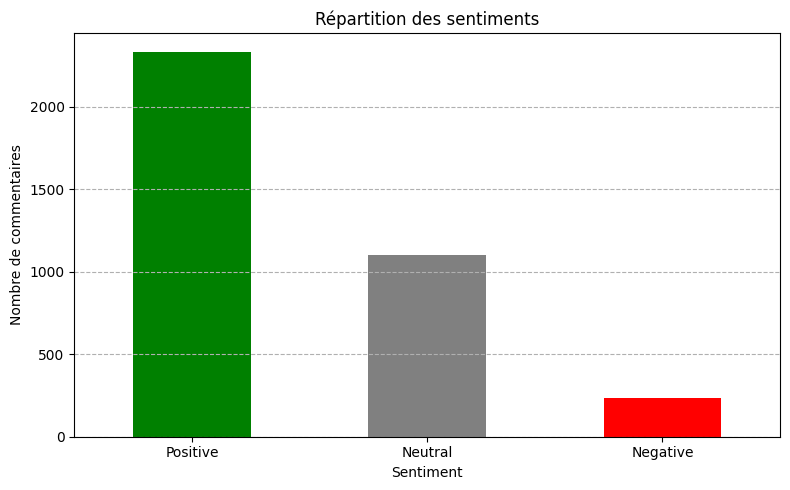

In [7]:
# 5. Graphique à barres
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Répartition des sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

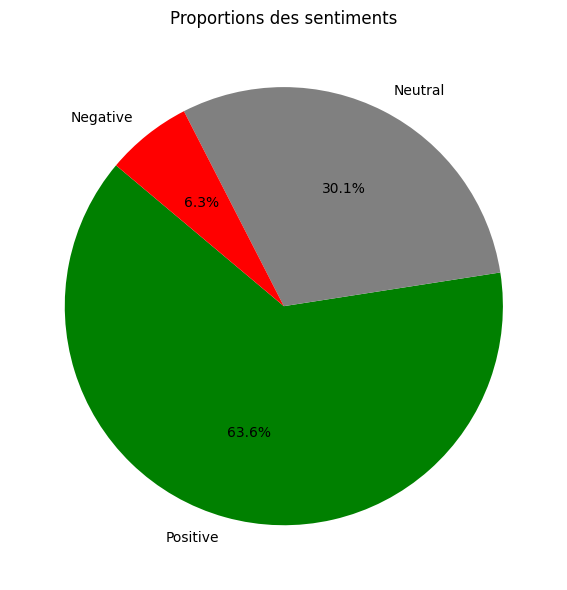

In [8]:
# 6. Graphique en camembert
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'])
plt.title("Proportions des sentiments")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [10]:
# 7. Créer un CSV avec asin + sentiment
result_df = df[['asin', 'sentiment']]
result_df.to_csv("sentiments_par_asin.csv", index=False)
print("\n✅ Fichier 'sentiments_par_asin.csv' créé avec succès.")


✅ Fichier 'sentiments_par_asin.csv' créé avec succès.
